### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

2. Investigate the dataset for missing or problematic data.

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values: \n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Duplicates: \n", duplicates)

Missing Values: 
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Duplicates: 
 74


In [6]:
# For the duplicates there is no unique id so it is impossible to tell id these are indeed duplicates or merely coincidence that the data is the same.
#   It is feasible that multiple people could mee the exact same criteria at the same time given many factors such as temp would be the same for many users.
#   With only 79 entires I have decided to keep them as they will likely not skew the results greatly.  This may need revisited.

# Check the missing values to see if they can be replaced.

# data['Bar'].value_counts()
# data['car'].value_counts()
# data['CoffeeHouse'].value_counts()
# data['CarryAway'].value_counts()
# data['RestaurantLessThan20'].value_counts()
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#After browsing the missing data it seems we can add an additional category "NotSpecified" to the missing values in the following columns:
columns_to_replace = [
    'Bar', 'car', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
]

# Replace NaN with "NotSpecified" in the listed columns
data[columns_to_replace] = data[columns_to_replace].fillna('NotSpecified')

# Check for missing values
missing_values = data.isnull().sum()

#Verify there is no longer missing data.
print("Missing Values:\n", missing_values)

Missing Values:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [8]:
mean_y = data['Y'].mean()
formatted_mean_y = "{:.2%}".format(mean_y)
print(formatted_mean_y)

56.84%


5. Use a bar plot to visualize the `coupon` column.

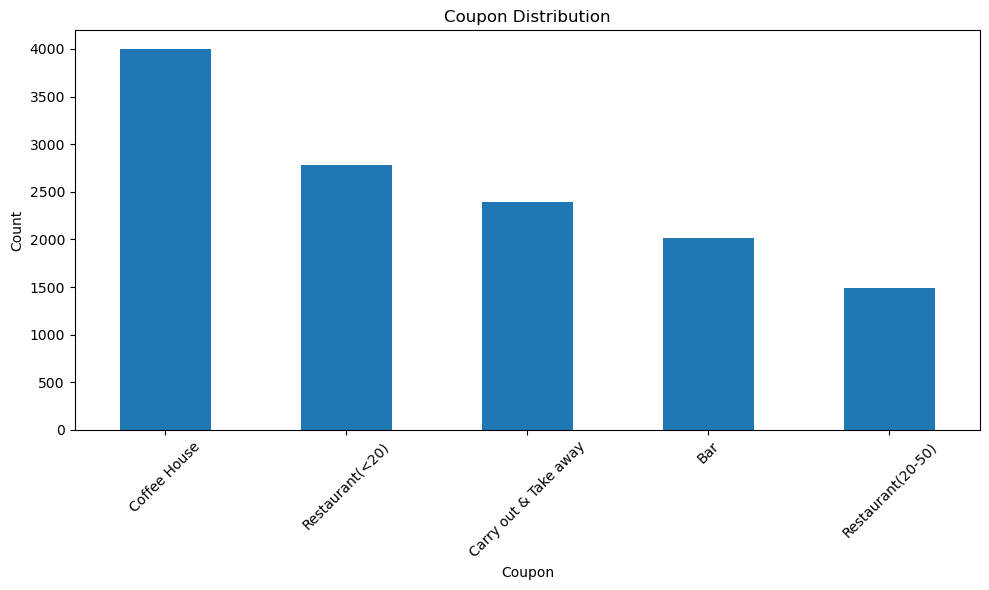

In [9]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
data['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

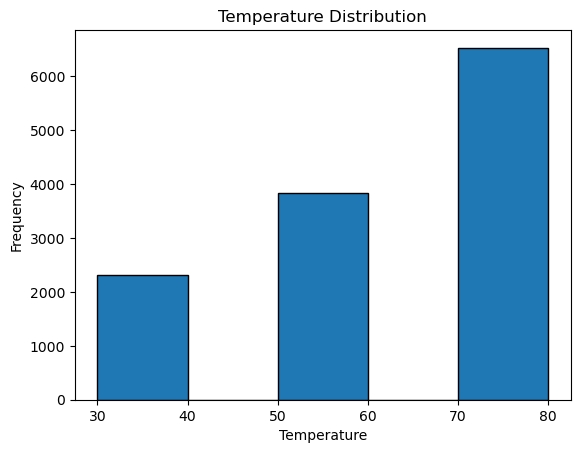

In [10]:
plt.hist(data['temperature'], bins=5, edgecolor='black')

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
data_bar = data.query('coupon == "Bar"')
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NotSpecified,never,never,NotSpecified,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NotSpecified,never,never,NotSpecified,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NotSpecified,never,never,NotSpecified,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NotSpecified,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NotSpecified,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [12]:
bar_accept = data_bar['Y'].mean()
formatted_mean_bar_accept = "{:.2%}".format(bar_accept)
print("Acceptance rate for bar coupons: ",formatted_mean_bar_accept)

Acceptance rate for bar coupons:  41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# Define the categories for comparison
fewer_than_3_times = ['never', 'less1', '1~3']
more_than_3_times = ['gt8', '4~8']

# Filter data for drivers who went to a bar 3 or fewer times a month
fewer_than_3_times_df = data_bar[data_bar['Bar'].isin(fewer_than_3_times)]

# Calculate acceptance rate for this group and convert to percentage
fewer_than_3_times_acceptance_rate = fewer_than_3_times_df['Y'].mean()

# Filter data for drivers who went to a bar more than 3 times a month
more_than_3_times_df = data_bar[data_bar['Bar'].isin(more_than_3_times)]

# Calculate acceptance rate for this group and convert to percentage
more_than_3_times_acceptance_rate = more_than_3_times_df['Y'].mean()

# Filter data for drivers with 'NotSpecified' in 'Bar' column
not_specified_df = data_bar[data_bar['Bar'] == 'NotSpecified']

# Calculate acceptance rate for this group and convert to percentage
not_specified_acceptance_rate = not_specified_df['Y'].mean()

# Print the acceptance rates for comparison
print("Acceptance rate for those who went to a bar 3 or fewer times a month: {:.2%}".format(fewer_than_3_times_acceptance_rate))
print("Acceptance rate for those who went to a bar more than 3 times a month: {:.2%}".format(more_than_3_times_acceptance_rate))
print("Acceptance rate for those with 'NotSpecified' in 'Bar' column: {:.2%}".format(not_specified_acceptance_rate))



Acceptance rate for those who went to a bar 3 or fewer times a month: 37.06%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%
Acceptance rate for those with 'NotSpecified' in 'Bar' column: 38.10%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
# Convert 'Age' column to numeric values
data_bar['age_num'] = pd.to_numeric(data_bar['age'], errors='coerce')

# Filter data for drivers who go to a bar more than once a month and are over the age of 25
above_25_and_bar_goers = data_bar[(data_bar['Bar'].isin(['gt8', '4~8'])) & (data_bar['age_num'] > 25)]

# Calculate acceptance rate for this group
above_25_and_bar_acceptance_rate = above_25_and_bar_goers['Y'].mean()

# Filter data for all other drivers
others = data_bar[~((data_bar['Bar'].isin(['gt8', '4~8'])) & (data_bar['age_num'] > 25))]

# Calculate acceptance rate for others
others_acceptance_rate = others['Y'].mean()

# Print the acceptance rates for comparison
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {:.2%}".format(above_25_and_bar_acceptance_rate))
print("Acceptance rate for all other drivers: {:.2%}".format(others_acceptance_rate))


Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 77.69%
Acceptance rate for all other drivers: 38.66%


/var/folders/r1/svh0ymbn4_z1c57ykpgfxnb00000gn/T/ipykernel_10246/3375036240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar['age_num'] = pd.to_numeric(data_bar['age'], errors='coerce')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [15]:
#data_bar['passanger'].value_counts() #Check unique values for spelling (passanger incorrectly spelled)
#data_bar['occupation'].value_counts() #Check unique values for spelling

# Filter data for drivers who go to bars more than once a month
above_once_a_month = data_bar[data_bar['Bar'].isin(['gt8', '4~8', '1~3'])]
    # Note the inclusion of '1~3' in the filter above as it could include those who go to bars more than once a month
    
# Filter data for passengers who are not kids, not alone, and have occupations other than farming, fishing, or forestry
filtered_passengers = data_bar[(data_bar['passanger'] != 'Kid(s)') & (data_bar['passanger'] != 'Alone') & 
    (~data_bar['occupation'].isin(['Farming Fishing & Forestry']))]

# Calculate acceptance rate for drivers who go to bars more than once a month and format as percentage
above_once_a_month_acceptance_rate = above_once_a_month['Y'].mean()

# Calculate acceptance rate for passengers who are not kids, not alone, and have occupations other than farming, fishing, or forestry and format as percentage
filtered_passengers_acceptance_rate = filtered_passengers['Y'].mean()

# Print the acceptance rates for comparison
print("Acceptance rate for drivers who go to bars more than once a month: {:.2%}".format(above_once_a_month_acceptance_rate))
print("Acceptance rate for drivers that had passengers who are not kids, and have occupations other than farming, fishing, or forestry: {:.2%}".format(filtered_passengers_acceptance_rate))


Acceptance rate for drivers who go to bars more than once a month: 68.79%
Acceptance rate for drivers that had passengers who are not kids, and have occupations other than farming, fishing, or forestry: 48.36%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [16]:
# Convert 'income' to numeric
data_bar['age_num'] = pd.to_numeric(data_bar['age'], errors='coerce')

# go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_1_drivers = data_bar[
    (data_bar['Bar'].isin(['gt8', '4~8', '1~3'])) &  # go to bars more than once a month
        # Note the inclusion of 1~3 as it is possible to go to a bar more than once a month and still be included in this group
    (data_bar['passanger'] != 'Kid(s)') &  (data_bar['passanger'] != 'Alone') &    # had passengers that were not a kid
    (data_bar['maritalStatus'] != 'Widowed')  # and were not widowed
]

# go to bars more than once a month and are under the age of 30
condition_2_drivers = data_bar[
    (data_bar['Bar'].isin(['gt8', '4~8'])) &  # go to bars more than once a month
    (data_bar['age_num'] < 30)                    # and are under the age of 30
]

# go to cheap restaurants more than 4 times a month and income is less than 50K
condition_3_drivers = data_bar[
    (data_bar['RestaurantLessThan20'].isin(['gt8', '4~8'])) &  # go to cheap restaurants more than 4 times a month 
        # Note the inclusion of 4~8 as it is possible to go to a cheap restaurant only 4 times a month and still be included in this group
    (data_bar['income'].isin(['Less than $12500', '$25000 - $37499','$12500 - $24999','$37500 - $49999']) ) # and income is less than 50K
]

# Calculate acceptance rates for each group
condition_1_acceptance_rate = condition_1_drivers['Y'].mean()
condition_2_acceptance_rate = condition_2_drivers['Y'].mean()
condition_3_acceptance_rate = condition_3_drivers['Y'].mean()

# Print the acceptance rates for comparison
print("Acceptance rate for drivers meeting condition 1: {:.2%}".format(condition_1_acceptance_rate))
print("Acceptance rate for drivers meeting condition 2: {:.2%}".format(condition_2_acceptance_rate))
print("Acceptance rate for drivers meeting condition 3: {:.2%}".format(condition_3_acceptance_rate))



Acceptance rate for drivers meeting condition 1: 71.79%
Acceptance rate for drivers meeting condition 2: 81.82%
Acceptance rate for drivers meeting condition 3: 45.35%


/var/folders/r1/svh0ymbn4_z1c57ykpgfxnb00000gn/T/ipykernel_10246/4116103475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar['age_num'] = pd.to_numeric(data_bar['age'], errors='coerce')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [17]:
# Drivers under 30 with no kids, and go to bars more than once a month are very good targets for these types of coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Visualize the success of each coupon group

<Figure size 1200x800 with 0 Axes>

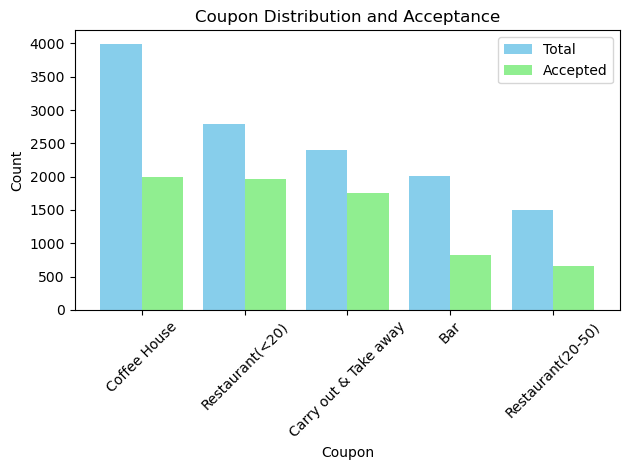

In [18]:
# Creating a summary DataFrame with total and accepted counts
total_coupons = data['coupon'].value_counts().rename('Total')
accepted_coupons = data[data['Y'] == 1]['coupon'].value_counts().rename('Accepted')

# Merging the two Series into a single DataFrame
summary_df = pd.DataFrame({'Total': total_coupons, 'Accepted': accepted_coupons}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
summary_df.plot(kind='bar', color=['skyblue', 'lightgreen'], width=0.8)
plt.title('Coupon Distribution and Acceptance')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()